In [3]:
# Neural Network --> simple code for creating a model and training it.
import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
class Model (nn.Module):
    # 4 layers for the picture therefore 4 hidden layers 
    def __init__(self , in_features=4, h1=8 ,h2=9, out_features=3):
    #  here 2 hidden layers are used h1 , h2 and they are given the no of neurons to each layer , out_features are the no of output for the neural network
        super().__init__() # instantiate our nn model
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self , x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [5]:
# pick a manual seed for randomization
torch.manual_seed(41)
# create an instance of an model
model = Model()

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [8]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
# converting the species to 0,1 ,2 as numbers are easy to handle in neural network
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [10]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [11]:
# Train Test Split Set x ,y 
x = my_df.drop('species' , axis = 1)
y = my_df['species']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# convert these to numpy arrays
x = x.values
y = y.values


In [14]:
X_train , X_test , y_train , y_test = train_test_split(x,y, test_size = 0.2 , random_state = 41)
# here the test size is taken as 0.2 or 20% it means that 20% of sample size is taken for testing and rest 80% trains it 
# random state 

In [15]:
# converts x features to float tensors 
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# 9:16

In [16]:
# converts y features to Long tensors
Y_train = torch.LongTensor(y_train)
Y_test = torch.LongTensor(y_test)

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters() ,lr=0.01)

In [18]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [19]:
# train in the model 
# Epochs   !!   ( one run  => all data at once 
epoch = 200
losses = []
for i in range (epoch):
    y_pred = model.forward(X_train)
    loss = criterion (y_pred , Y_train)
    losses.append(loss.detach().numpy())
    if i % 10 == 0:
        print(f'Epoch: {i} and loss is {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    


        
     

Epoch: 0 and loss is 1.1251550912857056
Epoch: 10 and loss is 1.0096259117126465
Epoch: 20 and loss is 0.8157405257225037
Epoch: 30 and loss is 0.585706353187561
Epoch: 40 and loss is 0.3999636471271515
Epoch: 50 and loss is 0.26768800616264343
Epoch: 60 and loss is 0.17942363023757935
Epoch: 70 and loss is 0.12151691317558289
Epoch: 80 and loss is 0.0860118493437767
Epoch: 90 and loss is 0.06520850956439972
Epoch: 100 and loss is 0.052865754812955856
Epoch: 110 and loss is 0.04508380591869354
Epoch: 120 and loss is 0.0397995188832283
Epoch: 130 and loss is 0.03597070649266243
Epoch: 140 and loss is 0.0329371802508831
Epoch: 150 and loss is 0.0304193664342165
Epoch: 160 and loss is 0.02679518237709999
Epoch: 170 and loss is 0.023382510989904404
Epoch: 180 and loss is 0.020531879737973213
Epoch: 190 and loss is 0.018495608121156693


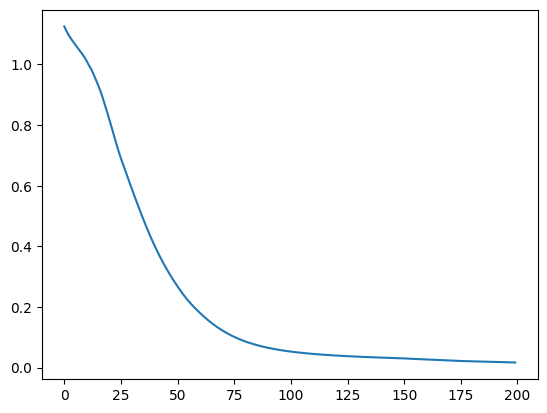

In [20]:
plt.plot(range(epoch),losses)

In [23]:
# Testing the trained model
with torch.no_grad():  # turning off back propogation
    y_eval = model.forward(X_test)
    loss = criterion (y_eval , Y_test) # finding the loss errors
    

In [24]:
loss

tensor(0.1816)

In [26]:
correct =0
with torch.no_grad():
    for i,data in enumerate (X_test):
        y_val = model.forward(data)
        print(f'{y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct+=1

print(f'we got {correct} ')

2.0
2.0
2.0
1.0
2.0
1.0
2.0
1.0
2.0
2.0
2.0
0.0
0.0
1.0
0.0
2.0
0.0
1.0
0.0
0.0
1.0
2.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
we got 28 
